# Testing the SSC code
This very small tutorial would like to show how the user-side of the code will look like.    
**DISCLAIMER:** take whatever you see *cum grano salis*, this is a package under developement! There could be $10^{\rm unknown}$ bugs, incorrect normalizations, whatsoever... it's just to show you the basis!  

We start importing useful libraries, our module is **ssc_model**

In [1]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from ssc_model import model, numerics
import astropy.units as u
import timeit

### ssc_test.py
**All you need is here!**     
You have to define four python dictionaries with the details of the model you want to create:  
1. a time grid  
2. a energy grid  
3. details of the emitting region (magnetic field, radius, escape time)  
4. details of the injected spectrum
5. distance [in astropy units] 

#### TODO:
1. and 2. should be hidden from the user, distance will be included in the *emitting region* dictionary

In [2]:
time_grid = dict(time_min = 0., time_max = 3., time_bins = 50)
gamma_grid = dict(gamma_min = 2., gamma_max = 2e5, gamma_bins = 20)
emission_region = dict(R = 1e16, B = 1., t_esc = 1.5)
injected_spectrum = dict(norm = 1e-3, alpha = -2., t_inj = 1.5)
dist = 2*u.Mpc

start = timeit.default_timer() # we start a timer to see how long does it take to run

Now we use the dictionaries to intialize a **model** object: a data structure containing the mesh on which we will solve the PDE, all the data related to the source.   
**numerics** takes the object as argument and initalize all the numerical procedures related to it

In [3]:
SSC = model(time_grid, gamma_grid, emission_region, injected_spectrum)
num = numerics(SSC)

We let the numerical problem to evolve and we fetch in N_e the final electron spectrum

In [4]:
# let us evolve it
N_e = num.evolve()

t after injection:  0.0  crossing time
t after injection:  0.06  crossing time
t after injection:  0.12  crossing time
t after injection:  0.18  crossing time
t after injection:  0.24  crossing time
t after injection:  0.3  crossing time
t after injection:  0.36  crossing time
t after injection:  0.42  crossing time
t after injection:  0.48  crossing time
t after injection:  0.54  crossing time
t after injection:  0.6  crossing time
t after injection:  0.66  crossing time
t after injection:  0.72  crossing time
t after injection:  0.78  crossing time
t after injection:  0.84  crossing time
t after injection:  0.9  crossing time
t after injection:  0.96  crossing time
t after injection:  1.02  crossing time
t after injection:  1.08  crossing time
t after injection:  1.14  crossing time
t after injection:  1.2  crossing time
t after injection:  1.26  crossing time
t after injection:  1.32  crossing time
t after injection:  1.38  crossing time
t after injection:  1.44  crossing time
t aft

Now we use **naima** for calculating the radiative processes: Synchrotron and then Inverse compton on the Synchrotron photons. We check also how long did it take...

In [5]:
# calculate the SED
# fetch the naima inverse compton and synchrotron object
SYN = num.synchrotron(N_e)
IC = num.inverse_compton(N_e)

stop = timeit.default_timer()
print 'Computational time: '
print stop - start, ' s'

Computational time: 
0.152348041534  s


And finally we nicely plot everything

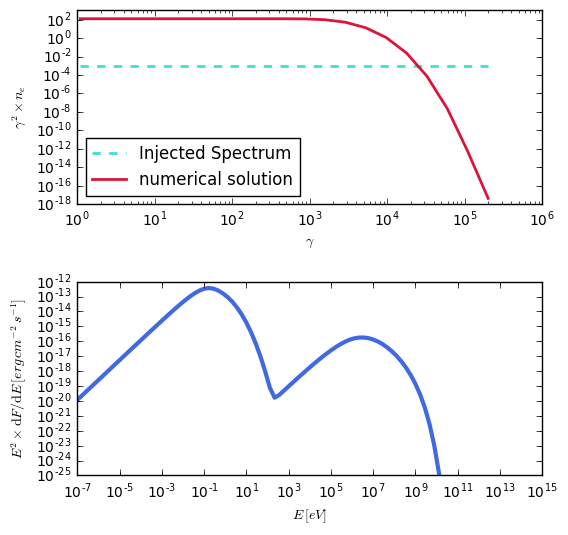

In [6]:
# plotting section
fig, axes = plt.subplots(2, 1, figsize=(6,6))
fig.subplots_adjust(hspace = 0.4)
font = {'family': 'serif',  'color':'black', 'weight': 'normal', 'size': 16.} # font definitions

# first plot with electron spectrum
axes[0].plot(SSC.gamma_grid, SSC.gamma_grid**2*SSC.N_e_inj,  ls = '--', lw=2, marker = '',
            color = 'turquoise', label = 'Injected Spectrum')
axes[0].plot(SSC.gamma_grid, SSC.gamma_grid**2*N_e,  ls = '-', lw=2, marker = '',
            color = 'crimson', label = 'numerical solution')
axes[0].legend(loc = 0, numpoints = 1., prop = {'size':12.})
axes[0].set_xscale('log')
axes[0].set_xlabel(r'$\gamma$')
axes[0].set_ylabel(r'$\gamma^2 \times n_{e}$')
axes[0].set_yscale('log')


energy = np.logspace(-7, 15, 100) * u.eV
axes[1].plot(energy, SYN.sed(energy, dist) + IC.sed(energy,dist), lw=3, color='royalblue', label='Synchrotron + Inverse Compton')
axes[1].set_xlabel(r'$E\,[eV]$')
axes[1].set_ylabel(r'$E^{2} \times {\rm d}F/{\rm d}E\,[erg\,cm^{-2}\,s^{-1}]$')
axes[1].set_ylim(1e-25, 1e-12)
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.show()